In [ ]:
#İlgili kütüphanelerin import edilmesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#github veri setinin tarih sütunu index olacak şekilde okunması
url = "https://github.com/TheEconomist/big-mac-data/blob/master/output-data/big-mac-full-index.csv?raw=true"
bigMac = pd.read_csv(url, index_col = "date")

In [ ]:
#İlk 5 satırın incelenmesi
bigMac.head()

,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
date,,,,,,,,,,,,,,,,,,
2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,0.11607,0.05007,-0.16722,-0.09864,1.09091,7803.328512,1.922652,0.39117,NaN,-0.06626,0.10096,0.97153
2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.31176,-0.35246,-0.48645,-0.44416,0.28939,29144.876973,2.301550,-0.28335,NaN,-0.51898,-0.43285,0.01563
2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.26427,-0.30778,-0.45102,-0.40581,0.37836,4822.738983,1.869734,-0.05696,NaN,-0.36704,-0.25369,0.33645
2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.13448,-0.18566,-0.35417,-0.30099,0.62152,26087.329235,2.247266,-0.07698,NaN,-0.38047,-0.26953,0.30809
2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.54937,0.45774,0.15609,0.25130,1.90267,23872.716095,2.207948,0.68172,NaN,0.12876,0.33090,1.38330


In [ ]:
#Son 5 satırın incelenmesi
bigMac.tail()

,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
date,,,,,,,,,,,,,,,,,,
2022-07-01,URY,UYU,Uruguay,255.00,41.91000,6.084467,0.18145,0.27689,0.37037,1.15086,0.71058,14726.863618,3.599789,0.49213,0.43239,0.58961,1.58970,0.73019
2022-07-01,USA,USD,United States,5.15,1.00000,5.150000,0.00000,0.08078,0.15991,0.82053,0.44787,69231.400000,4.546401,0.00000,-0.04003,0.06533,0.73557,0.15955
2022-07-01,VEN,VES,Venezuela,10.00,5.67320,1.762674,-0.65773,-0.63008,-0.60300,-0.37689,-0.50444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,VNM,VND,Vietnam,69000.00,23417.00000,2.946577,-0.42785,-0.38163,-0.33636,0.04162,-0.17160,6375.564885,3.454747,-0.24706,-0.27720,-0.19787,0.30679,-0.12693
2022-07-01,ZAF,ZAR,South Africa,39.90,17.03625,2.342065,-0.54523,-0.50849,-0.47251,-0.17208,-0.34155,13261.543640,3.574340,-0.42155,-0.44471,-0.38376,0.00394,-0.32926


In [ ]:
#Veri setinden analizde kullanılacak sütunların alınması(date index sütun)
bigMac_clean = bigMac[["name", "dollar_price", "GDP_bigmac"]]

In [ ]:
#Gözlem sayısı ve veri tiplerine bakılması
bigMac_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1631 entries, 2000-04-01 to 2022-07-01
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1631 non-null   object 
 1   dollar_price  1631 non-null   float64
 2   GDP_bigmac    1386 non-null   float64
dtypes: float64(2), object(1)
memory usage: 51.0+ KB


In [ ]:
#İstatistiksel değerlere bakılması
bigMac_clean.describe()

,dollar_price,GDP_bigmac
count,1631.000000,1386.000000
mean,3.321235,25301.133285
std,1.272416,19799.780014
min,0.639966,0.002214
25%,2.387381,8245.885775
50%,3.144200,20180.859186
75%,4.052444,39933.908609
max,9.081066,98893.859046


In [ ]:
#Index olan tarih sütunundan sadece yıl değerlerinin alınarak yeni bir sütun oluşturulması
bigMac_clean['year'] = pd.to_datetime(bigMac_clean.index).year
bigMac_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,dollar_price,GDP_bigmac,year
date,,,,
2000-04-01,Argentina,2.500000,7803.328512,2000
2000-04-01,Australia,1.541667,29144.876973,2000
2000-04-01,Brazil,1.648045,4822.738983,2000
2000-04-01,Canada,1.938776,26087.329235,2000
2000-04-01,Switzerland,3.470588,23872.716095,2000


In [ ]:
#Veri setinde yıl içerisinde birden fazla gözlem bulunması nedeniyle verinin gruplanıp yıllık ortalamaların hesaplanması
year_result = bigMac_clean.groupby(['name','year'])[['dollar_price', 'GDP_bigmac']].mean().reset_index()
year_result.head()

,name,year,dollar_price,GDP_bigmac
0,Argentina,2000,2.500000,7803.328512
1,Argentina,2001,2.500000,7740.134528
2,Argentina,2002,0.798722,7600.234640
3,Argentina,2003,1.423611,5589.438000
4,Argentina,2004,1.477966,6287.377635


In [ ]:
#Tüm değerler içerisinden 2022 yılı verilerinin alınması
year_result_2022 = year_result[year_result["year"] == 2022]
year_result_2022.head()

,name,year,dollar_price,GDP_bigmac
22,Argentina,2022,4.427305,10099.399321
45,Australia,2022,4.567400,65751.696843
50,Azerbaijan,2022,2.708086,10166.366159
55,Bahrain,2022,4.111406,32324.859173
78,Brazil,2022,4.279924,9082.840036


In [ ]:
"""Bigmac endeksi Amerika hamburger fiyatlarının diğer ülke fiyatları ile
karşılaştırması olduğundan 2022 yılı Amerikan fiyatlarının ayrı sütun haline getirilmesi"""

usa_year_result = year_result_2022[year_result_2022["name"] == "United States"]
year_result_2022["usa_dollar_price"] = usa_year_result["dollar_price"].values[0]
year_result_2022.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,name,year,dollar_price,GDP_bigmac,usa_dollar_price
22,Argentina,2022,4.427305,10099.399321,5.095
45,Australia,2022,4.567400,65751.696843,5.095
50,Azerbaijan,2022,2.708086,10166.366159,5.095
55,Bahrain,2022,4.111406,32324.859173,5.095
78,Brazil,2022,4.279924,9082.840036,5.095


In [ ]:
#Ülke fiyatlarının Amerikan fiyatları karşısındaki değerini gösteren exchange rate isimli sütun oluşturma
#Excgange rate değerlerini büyükten küçüğe doğru sıralama
year_result_2022["exchange_rate"] = round(((year_result_2022["dollar_price"] - year_result_2022["usa_dollar_price"])/year_result_2022["usa_dollar_price"])*100, 2)
year_result_2022.sort_values(by = "exchange_rate", ascending= False, inplace = True)
year_result_2022.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,year,dollar_price,GDP_bigmac,usa_dollar_price,exchange_rate
822,Switzerland,2022,6.846561,67132.969451,5.095,34.38
546,Norway,2022,6.328539,65617.487628,5.095,24.21
969,Uruguay,2022,5.755953,15052.006827,5.095,12.97
799,Sweden,2022,5.687326,47283.879447,5.095,11.63
124,Canada,2022,5.287343,49143.831531,5.095,3.78


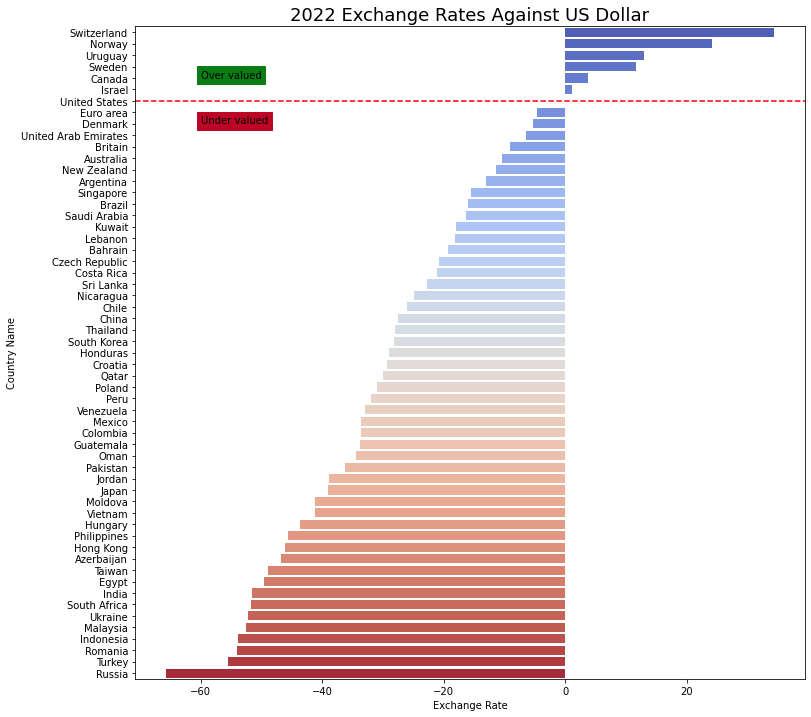

In [ ]:
#2022 yılı exchange değerlerinin yatay çubuk grafik ile görselleştirilmesi
plt.figure(figsize=(12,12))
graph = sns.barplot(x="exchange_rate", y="name", data=year_result_2022,
            label="Rate", orient = 'h', palette = "coolwarm")
graph.axhline(6, linestyle = "--", color = "r")
plt.xlabel('Exchange Rate') 
plt.ylabel('Country Name')
plt.annotate("Over valued", xy = (-60, 4), backgroundcolor = "#087D14")
plt.annotate("Under valued", xy = (-60, 8), backgroundcolor = "#BD0526")
plt.title("2022 Exchange Rates Against US Dollar", fontsize=18)
plt.show()

In [ ]:
"""
Amerika için dolar cinsinden fiyatların yıllık ortalamaların hesaplanması
Türkiye için dolar cinsinden fiyatların yıllık ortalamaların hesaplanması
Amerika ve Türkiye dışında kalan ülkelerin tümü için dolar cinsinden fiyatların yıllık ortalamaların hesaplanması

Yıllar için ayrı ayrı exchange rate oluşturulması

"""
all_year_result_usa = bigMac_clean[bigMac_clean["name"] == "United States"].groupby(['year'])[[ 'dollar_price']].mean().reset_index()
all_year_result_turkey = bigMac_clean[bigMac_clean["name"] == "Turkey"].groupby(['year'])[[ 'dollar_price']].mean().reset_index()
all_year_result_not_usa_turkey = bigMac_clean[~(bigMac_clean["name"].isin(["United States", "Turkey"]))].groupby(['year'])[[ 'dollar_price']].mean().reset_index()

all_year_result_usa.rename(columns = {'year':'usa_year', 'dollar_price':'usa_dollar_price'}, inplace = True)
all_year_result_not_usa_turkey.rename(columns = {'year':'year', 'dollar_price':'world_dollar_price'}, inplace = True)
all_year_result_turkey.rename(columns = {'year':'year', 'dollar_price':'turkey_dollar_price'}, inplace = True)

all_year_result_usa_for_turkey = all_year_result_usa[all_year_result_usa["usa_year"] > 2001]
all_year_result_usa_for_turkey.reset_index(inplace=True)

all_year_result_usa.drop(columns=["usa_year"], inplace = True)
all_year_result_usa_for_turkey.drop(columns=["usa_year", "index"], inplace = True)
world_vs_usa = pd.concat([all_year_result_not_usa_turkey, all_year_result_usa ], axis=1)
turkey_vs_usa = pd.concat([all_year_result_turkey, all_year_result_usa_for_turkey], axis=1)

world_vs_usa["world_exchange_rate"] = round(((world_vs_usa["world_dollar_price"] - world_vs_usa["usa_dollar_price"])/world_vs_usa["usa_dollar_price"])*100, 2)
turkey_vs_usa["turkey_exchange_rate"] = round(((turkey_vs_usa["turkey_dollar_price"] - turkey_vs_usa["usa_dollar_price"])/turkey_vs_usa["usa_dollar_price"])*100, 2)
turkey_vs_usa['year'] = pd.to_datetime(turkey_vs_usa['year'], format='%Y')
world_vs_usa['year'] = pd.to_datetime(world_vs_usa['year'], format='%Y')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
world_vs_usa.head()

,year,world_dollar_price,usa_dollar_price,world_exchange_rate
0,2000-01-01,2.053603,2.24,-8.32
1,2001-01-01,1.867180,2.24,-16.64
2,2002-01-01,2.002311,2.35,-14.80
3,2003-01-01,2.127945,2.46,-13.50
4,2004-01-01,2.213415,2.47,-10.39


In [ ]:
turkey_vs_usa.head()

,year,turkey_dollar_price,usa_dollar_price,turkey_exchange_rate
0,2002-01-01,3.020008,2.350,28.51
1,2003-01-01,2.343018,2.460,-4.76
2,2004-01-01,2.580013,2.470,4.45
3,2005-01-01,2.921841,2.580,13.25
4,2006-01-01,2.896167,2.725,6.28


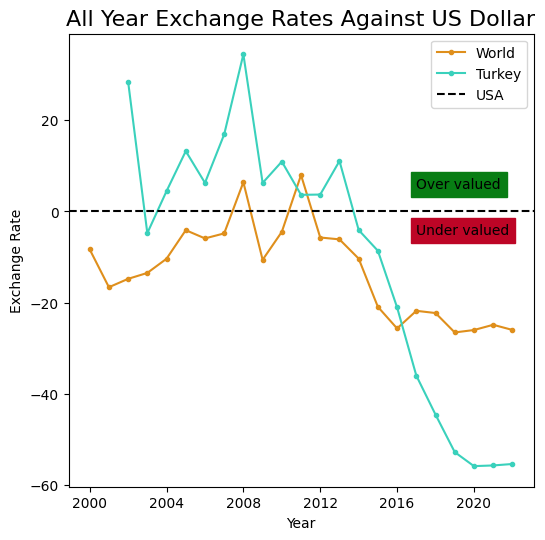

In [ ]:
#Dünya ve Türkiye ortalamasının Amerikan Doları karşısındaki durumunun çizgi grafik ile görselleştirilmesi
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
fig.set_dpi(100)
ax.plot(world_vs_usa["year"], world_vs_usa["world_exchange_rate"], color = "#DF8F1C", marker = ".")
ax.plot(turkey_vs_usa["year"], turkey_vs_usa["turkey_exchange_rate"], color = "#3AD1BC", marker = ".")
ax.axhline(0, linestyle = "--", color = "black")
plt.legend(["World", "Turkey", "USA"])
plt.xlabel('Year') 
plt.ylabel('Exchange Rate')
plt.annotate("Over valued", xy = (turkey_vs_usa["year"].values[-6], 5), backgroundcolor = "#087D14")
plt.annotate("Under valued", xy = (turkey_vs_usa["year"].values[-6], -5), backgroundcolor = "#BD0526")
plt.title("All Year Exchange Rates Against US Dollar", fontsize=16)
plt.show()

In [ ]:
#Info methodunda GDP sütüununda null değerler olduğundan 2022 yılında hangi gözlemlerin null odluğuna bakma
year_result_2022[year_result_2022["GDP_bigmac"].isnull()]

,name,year,dollar_price,GDP_bigmac,usa_dollar_price,exchange_rate
447,Lebanon,2022,4.166969,NaN,5.095,-18.21
984,Venezuela,2022,3.412425,NaN,5.095,-33.02


In [ ]:
#Null değerlerin veri seti dışında bırakılması
not_na_year_result_2022 = year_result_2022[~(year_result_2022["GDP_bigmac"].isnull())]

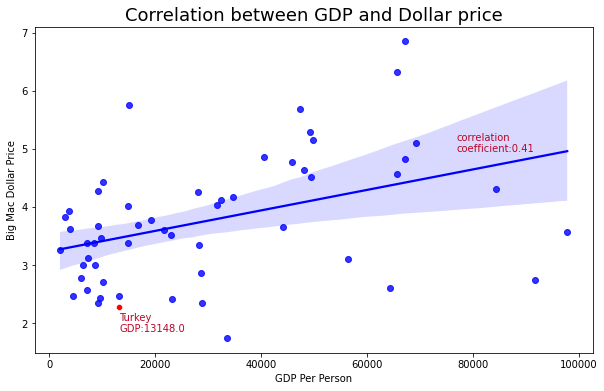

In [ ]:
#Kişi başına milli gelir ile Dolar cinsinden BiG Mac fiyatları arasındaki korelasyonun dağılım grafiği ile görselleştirilmesi
year_result_2022_turkey = not_na_year_result_2022[not_na_year_result_2022["name"] == "Turkey"]
year_result_2022_not_turkey = not_na_year_result_2022[~(not_na_year_result_2022["name"] == "Turkey")]
x = year_result_2022_turkey["GDP_bigmac"].values[0]
y = year_result_2022_turkey["dollar_price"].values[0]
c = (stats.pearsonr(year_result_2022_not_turkey["GDP_bigmac"], year_result_2022_not_turkey["dollar_price"]))[0]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=year_result_2022_turkey, x="GDP_bigmac", y="dollar_price", color = "r")
p = sns.regplot(data=year_result_2022_not_turkey, x="GDP_bigmac", y="dollar_price", color = "b")
plt.xlabel('GDP Per Person') 
plt.ylabel('Big Mac Dollar Price')
plt.annotate("Turkey\nGDP:{}".format(round(x,0)), xy = (x, 1.85), color = "#BD0526")
plt.annotate("correlation\ncoefficient:{}".format(round(c,2)), xy = (77000, 4.95), color = "#BD0526")
plt.title("Correlation between GDP and Dollar price", fontsize=18)
plt.show()

In [ ]:
#Kişi başına milli geliri Türkiye'ye benzer olan ülkelerin seçilmesi
country_names = not_na_year_result_2022[not_na_year_result_2022["GDP_bigmac"].between(10000, 20000)]["name"].values
year_result_similar = year_result[year_result["name"].isin(country_names)]
year_result_similar.head()

,name,year,dollar_price,GDP_bigmac
0,Argentina,2000,2.500000,7803.328512
1,Argentina,2001,2.500000,7740.134528
2,Argentina,2002,0.798722,7600.234640
3,Argentina,2003,1.423611,5589.438000
4,Argentina,2004,1.477966,6287.377635


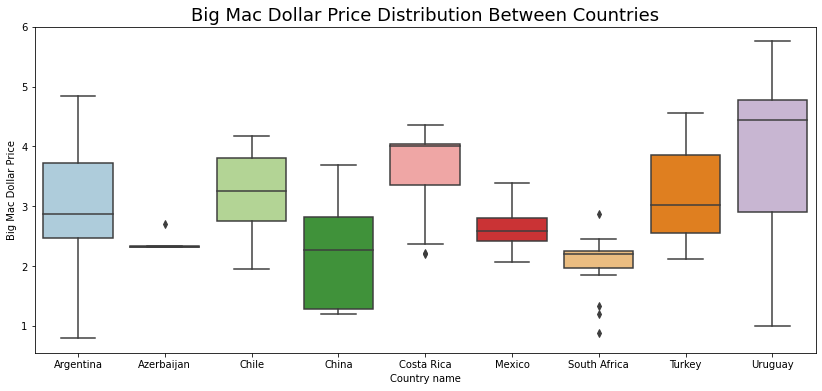

In [ ]:
#Big Mac Fiyatlarının Kişi Başı Milli Geliri Benzer Olan Ülkeler Arasındaki Dağılımının Kutu Grafik İle Görselleştirilmesi
plt.figure(figsize=(14, 6))
sns.boxplot(data=year_result_similar, x="name", y="dollar_price", palette = "Paired")
plt.xlabel("Country name") 
plt.ylabel('Big Mac Dollar Price')
plt.title("Big Mac Dollar Price Distribution Between Countries", fontsize=18)
plt.show()